# Problem #1

The following question is about SAT test data. In this dataset, the statewide mean verbal and mean math SAT scores (from 1998) were recorded for each of the 50 United States and the District of Columbia. The data set also includes the estimated percent of high graduates who took the SAT in each state. (Source: The World Almanac and Book of Facts, 1999, p. 245)

There are four columns of data:

    Column      Name           Description 

     C1         State          State abbreviation  
     C2         Verbal         Mean verbal SAT in state  
     C3         Math           Mean math SAT in state  
     C4         PctTook        Percent of graduates who took the SAT  

We fit an SLR model (as we did on exam #1!).

In [1]:
# install.packages("MindOnStats")
library(MindOnStats)
data(SATS98)
sat = SATS98
head(sat)
lmod = lm(Math ~ Verbal, data = sat)
summary(lmod)

State,Verbal,Math,PctTook
AL,562,558,8
AK,521,520,52
AZ,525,528,32
AR,568,555,6
CA,497,516,47
CO,537,542,31



Call:
lm(formula = Math ~ Verbal, data = sat)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9442  -4.9656  -0.0069   2.9900  29.2274 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.88470   18.49331  -0.318    0.752    
Verbal       1.01378    0.03468  29.233   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.303 on 49 degrees of freedom
Multiple R-squared:  0.9458,	Adjusted R-squared:  0.9447 
F-statistic: 854.6 on 1 and 49 DF,  p-value: < 2.2e-16


#### (a) Print the four standard plots associated with the linear regression model. Using these plots, decide whether there is any evidence of nonconstant variance, nonlinearity, or deviation from normality. 

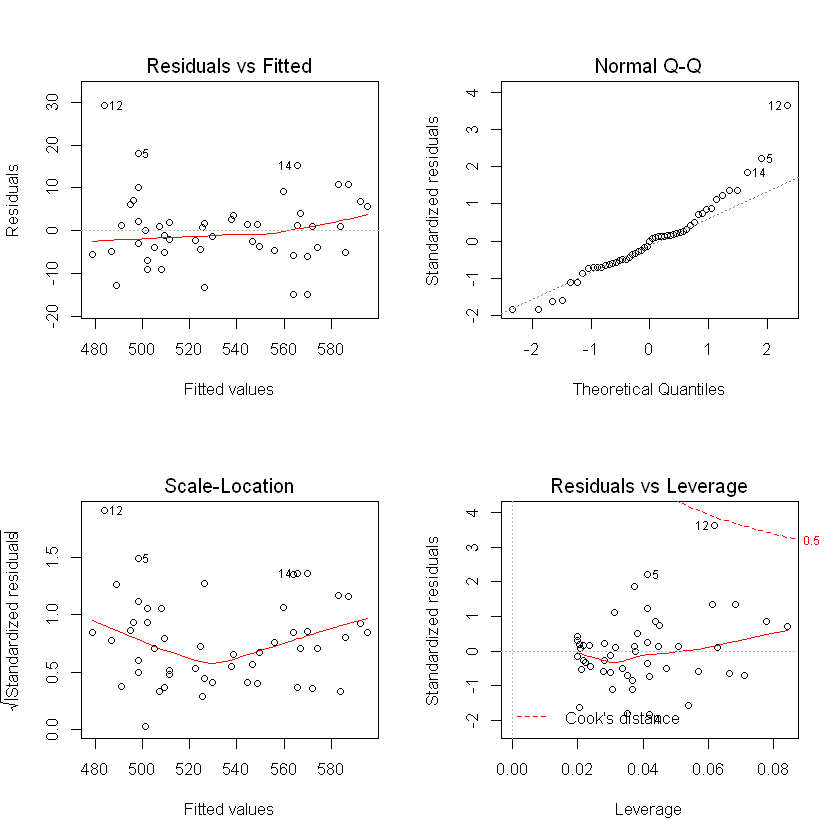

In [2]:
par(mfrow = c(2,2))
plot(lmod)

From the residuals vs. Fitted plot, we can see that there are some outliers that contributed to a nonconstant variance and nonlinearity. However, for the most part, the data does follow the assumptions.  
There is some evidence that the residuals do not follow a normal distribution. The Normal Q-Q plot shows that the residuals are not entirely normal when near the tails of the data. 

#### (b) Add a new "predictor" to the data frame called "noise". This predictor should just be random numbers from a standard normal distribution. Then, construct two plots (1) a plot of the residuals vs PctTook, and (2) a plot of the residuals vs noise. Do either of these plots provide evidence that the corresponding predictor should be added to the model?

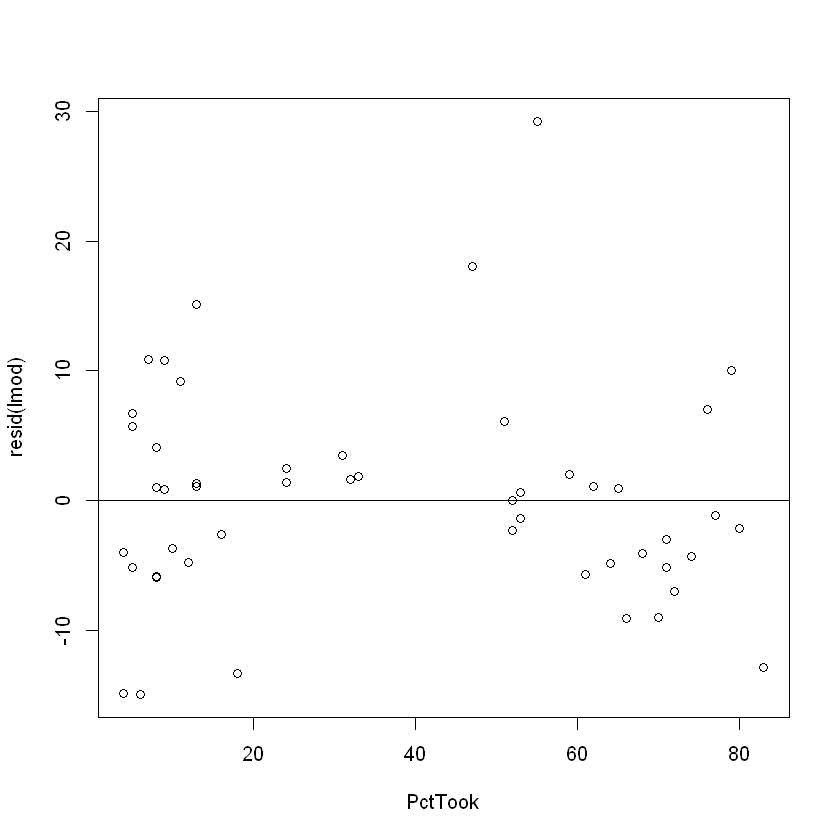

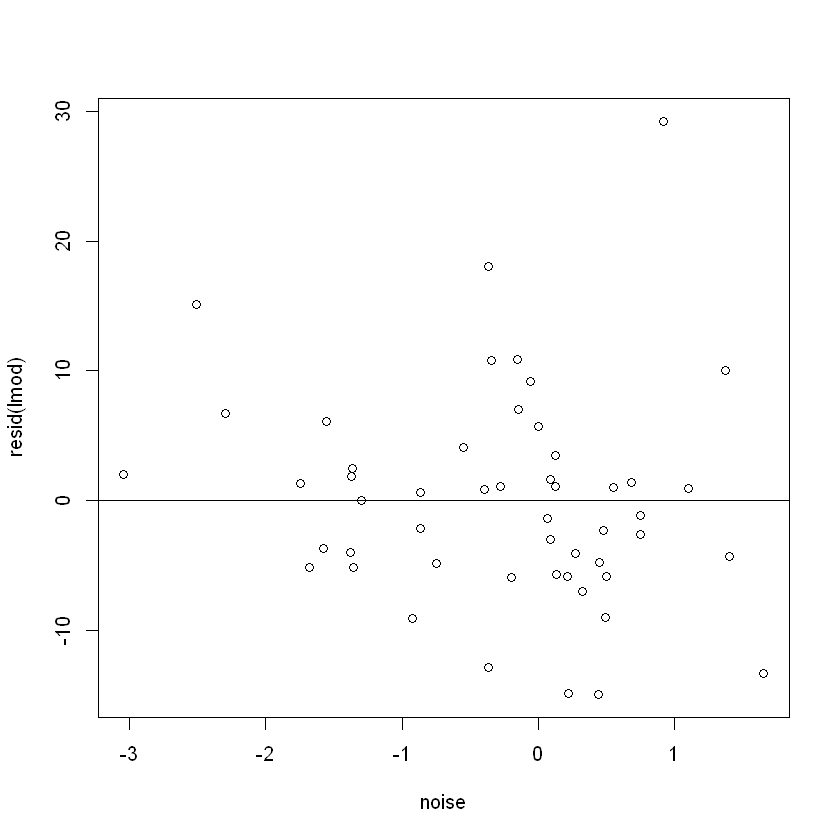

In [3]:
set.seed(99)
with(sat, plot(PctTook, resid(lmod))); abline(0,0)
sat$noise = rnorm(length(sat$PctTook), 0, 1)
with(sat, plot(noise, resid(lmod))); abline(0, 0)

No, there really doesn't appear to be any distinct structure to either plot so neither feature should be added to the model. 

#### (c) Fit the MLR model including PctTook and look at the diagnostic plots. How have things changed? Do you think we should include PctTook in the model? What about noise?


Call:
lm(formula = Math ~ Verbal + PctTook + noise, data = sat)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7591  -5.5838  -0.9165   3.2175  29.3629 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.63790   44.90734   0.415    0.680    
Verbal       0.97078    0.07831  12.397   <2e-16 ***
PctTook     -0.05203    0.09506  -0.547    0.587    
noise       -1.11163    1.16840  -0.951    0.346    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.36 on 47 degrees of freedom
Multiple R-squared:  0.9473,	Adjusted R-squared:  0.9439 
F-statistic: 281.4 on 3 and 47 DF,  p-value: < 2.2e-16


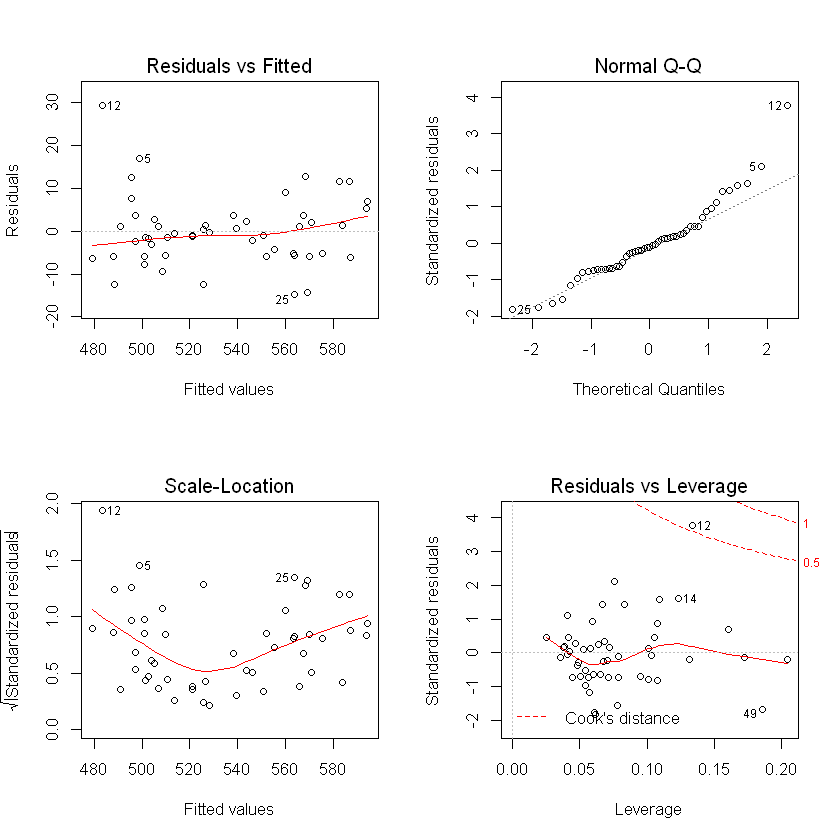

In [16]:
lmod2 = lm(Math ~ Verbal + PctTook + noise, data = sat)
summary(lmod2)
par(mfrow = c(2,2))
plot(lmod2)

The plots look very similar to the plots from the SLR model. We can note that the Normal Q-Q plot reveals that the tails of the data are heavier than in the SLR model because they seperate from the mid-line earlier. The Residuals vs. Fitted plot does not have significant differences. This leads us to believe that the PctTook and noise features do not significantly impact the models and can be left out.

# Problem #2

Simulate two different datasets for SLR: one violating the nonconstant variance assumption (you might consider making your variances a function of the predictor), and another violating the linearity assumption.  Produce the relevant diagnostic plots.

In [7]:
seq(1:25)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25

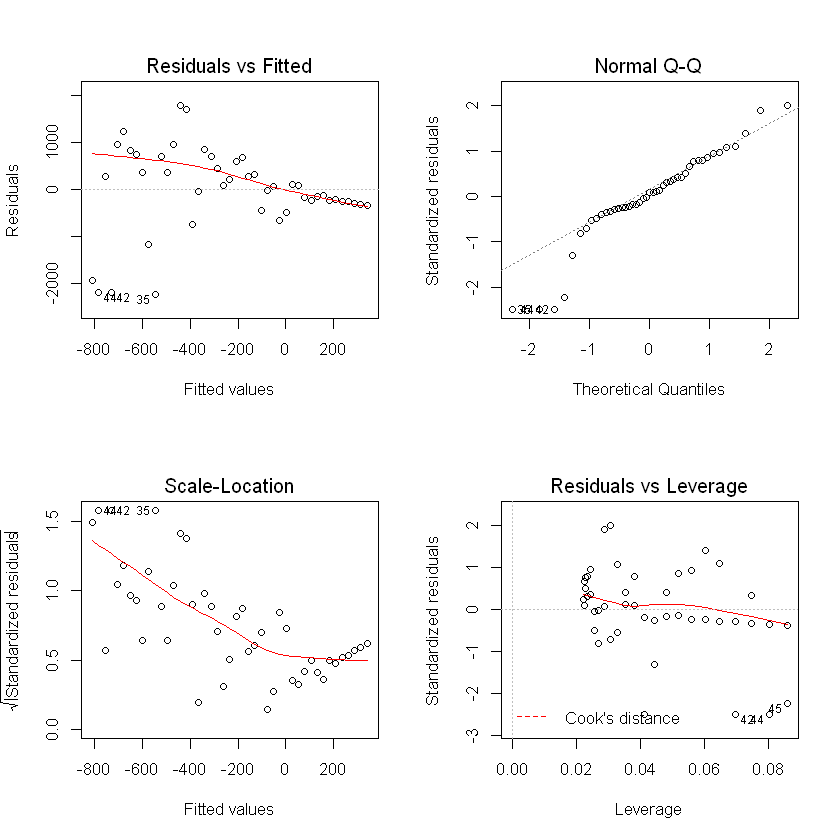

In [21]:
# Dataset with nonconstant variance
set.seed(99)
x1 = seq(1:45)
error = rnorm(45, 0, x1^2)
y1 = 1 + x1 + error
lmod1 = lm(y1 ~ x1)
par(mfrow = c(2,2))
plot(lmod1)

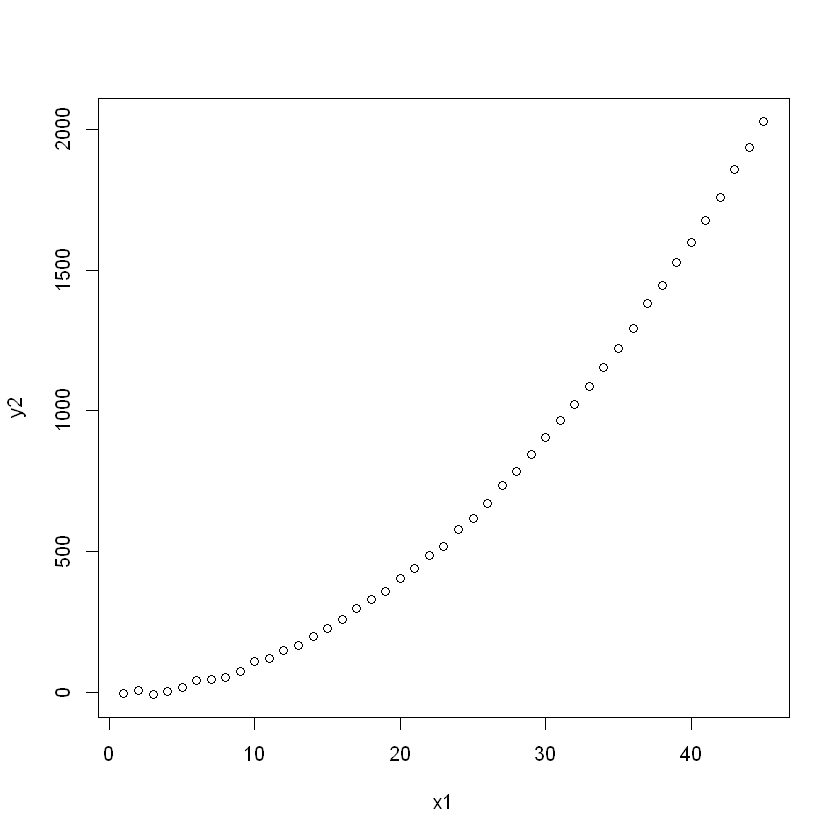

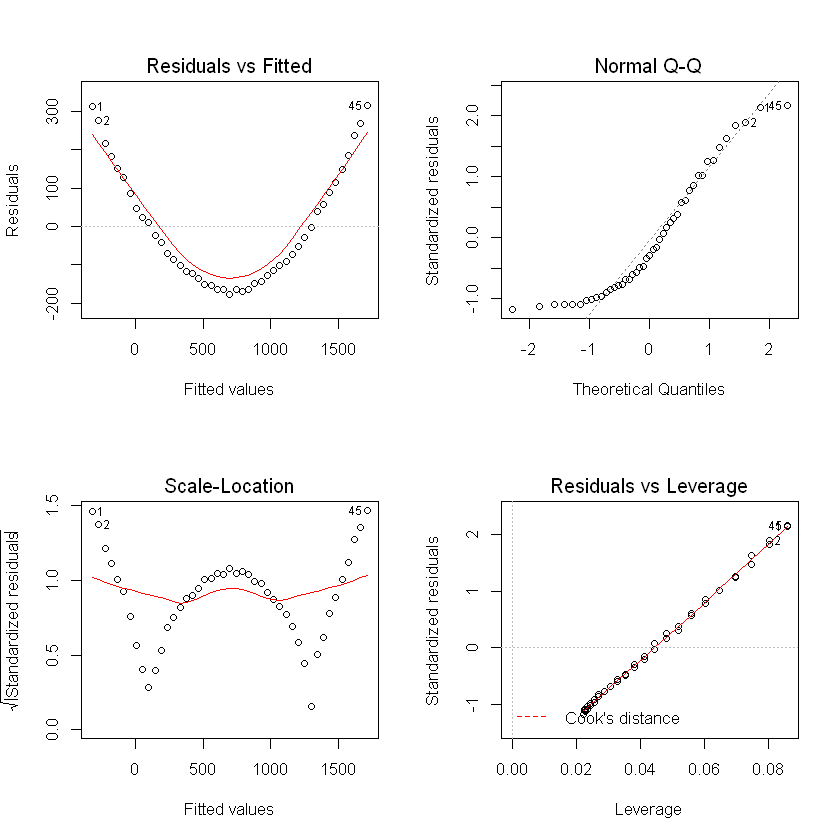

In [27]:
# Dataset violating Linearity
y2 = x1^2 + rnorm(45, 0, sd = 5)
plot(x1,y2)
lmod2 = lm(y2 ~ x1)
par(mfrow = c(2,2))
plot(lmod2)

## Problem #3

Consider the "globwarm" data in the faraway package. 

#### (a) Fit an MLR model using nhtemp as the response and all others (except year) as predictors. Check for violations of any assumptions.

In [2]:
library(faraway)
data(globwarm)

head(globwarm)
lmod = lm(nhtemp ~ wusa + jasper + westgreen + chesapeake + tornetrask + urals + mongolia + tasman, data = globwarm)

,nhtemp,wusa,jasper,westgreen,chesapeake,tornetrask,urals,mongolia,tasman,year
1000,NA,-0.66,-0.03,0.03,-0.66,0.33,-1.49,0.83,-0.12,1000
1001,NA,-0.63,-0.07,0.09,-0.67,0.21,-1.44,0.96,-0.17,1001
1002,NA,-0.60,-0.11,0.18,-0.67,0.13,-1.39,0.99,-0.22,1002
1003,NA,-0.55,-0.14,0.30,-0.68,0.08,-1.34,0.95,-0.26,1003
1004,NA,-0.51,-0.15,0.41,-0.68,0.06,-1.30,0.87,-0.31,1004
1005,NA,-0.47,-0.15,0.52,-0.68,0.07,-1.25,0.77,-0.37,1005


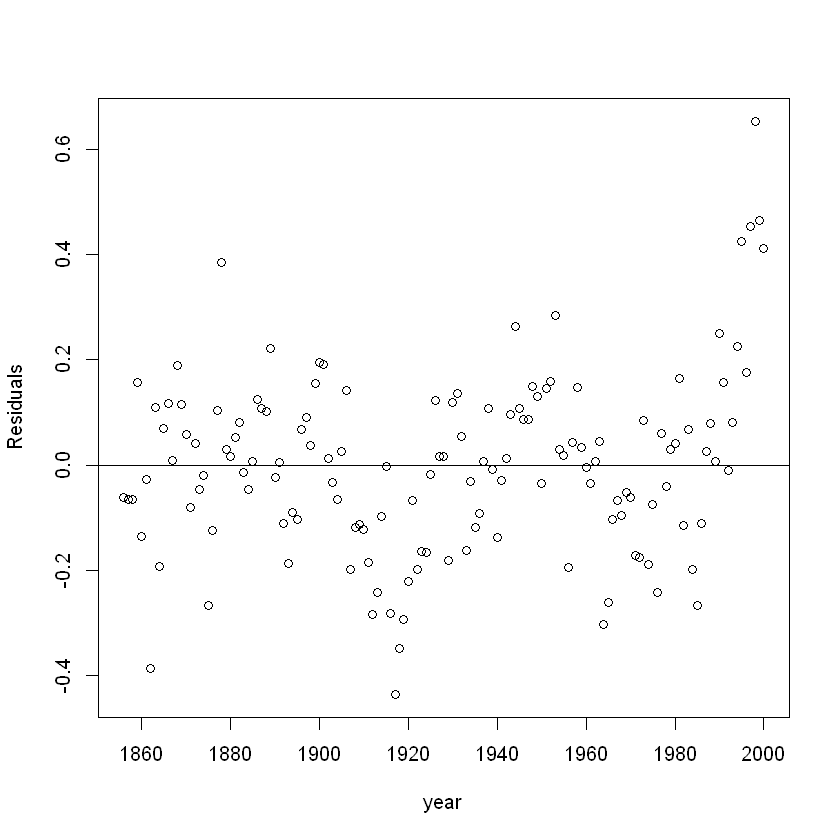

[1] 0.583339

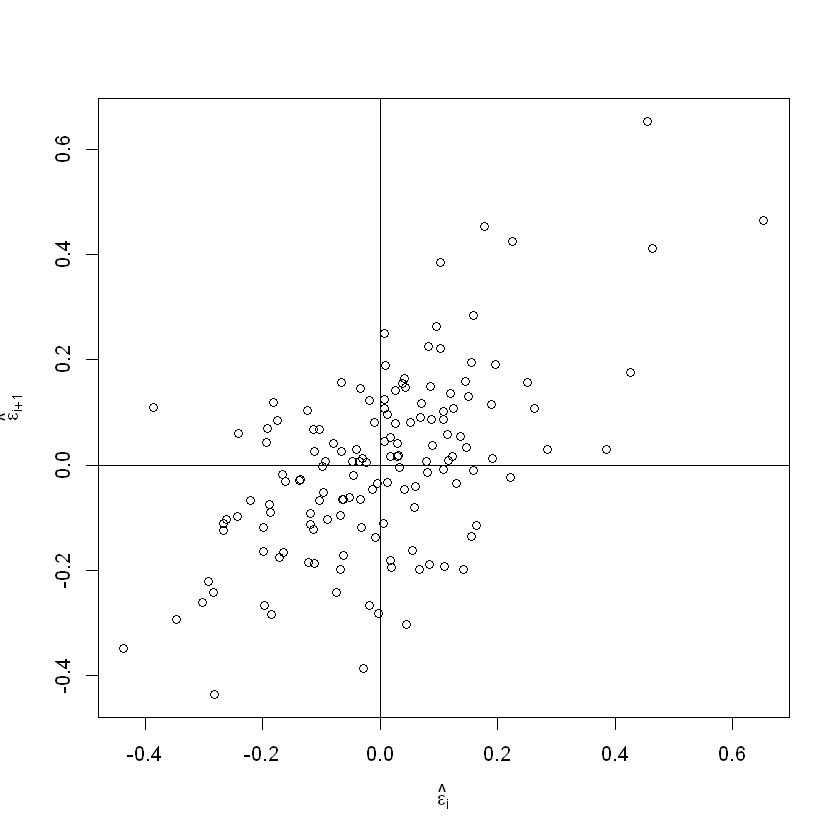

In [3]:
plot(resid(lmod) ~ year, na.omit(globwarm), ylab = "Residuals"); abline(0,0)
n = length(resid(lmod))
plot(tail(residuals(lmod), n-1) ~ head(resid(lmod), n-1), xlab = expression(hat(epsilon)[i]), ylab = expression(hat(epsilon)[i+1]))
abline(h = 0, v = 0)
cor(tail(residuals(lmod), n-1), head(resid(lmod), n-1))

The independent errors assumption is being violated in the data.

#### (b) Now, use the same predictors and response from (a), but fit a generalized least squares model using an AR1 correlation structure, with grouping variable year. Print a summary.

In [4]:
library(nlme)
mod = gls(nhtemp ~ wusa + jasper + westgreen + chesapeake + tornetrask + urals + mongolia + tasman,
         data = na.omit(globwarm), correlation = corAR1(form = ~1))
summary(mod)

Generalized least squares fit by REML
  Model: nhtemp ~ wusa + jasper + westgreen + chesapeake + tornetrask +      urals + mongolia + tasman 
  Data: na.omit(globwarm) 
        AIC       BIC   logLik
  -108.2074 -76.16822 65.10371

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.7109922 

Coefficients:
                  Value  Std.Error   t-value p-value
(Intercept) -0.23010624 0.06702406 -3.433188  0.0008
wusa         0.06673819 0.09877211  0.675678  0.5004
jasper      -0.20244335 0.18802773 -1.076668  0.2835
westgreen   -0.00440299 0.08985321 -0.049002  0.9610
chesapeake  -0.00735289 0.07349791 -0.100042  0.9205
tornetrask   0.03835169 0.09482515  0.404446  0.6865
urals        0.24142199 0.22871028  1.055580  0.2930
mongolia     0.05694978 0.10489786  0.542907  0.5881
tasman       0.12034918 0.07456983  1.613913  0.1089

 Correlation: 
           (Intr) wusa   jasper wstgrn chespk trntrs urals  mongol
wusa       -0.517                                  

#### (c) Explicitly write out the correlation model used in part (b). What is Phi in the summary above?

nhtemp = -0.23 + 0.07wusa - 0.20jasper - 0.004westgreen - 0.007chesapeake + 0.04tornetrask + 0.24urals + 0.06mongolia + 0.12tasman + 0.71 + $\gamma$.  
$\phi = 0.711$ in the model summary.

#### (d) What else is interesting about the summary above? Is there collinearity between predictors? What problems might this cause in the interpretation of the model?

Yes, we can see in the correlation matrix above that there is some collinearity between some predictors, such as between westgreen and wusa, which has a -0.533 correlation. Collinearity can cause problems in that increasing one predictor will also increase/decrese another predictor by some amount, meaning that they can never "adjusted for" 